In [72]:
# !pip install pandas matplotlib seaborn
# !pip install --upgrade pandas seaborn
# !pip list --outdated

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('/kaggle/input/world-cup-2023/CWC23_all_innings.csv')

In [75]:
print(df.head())
print(df.describe())

  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  
1   10.0   2.0   4.5     1 N

In [76]:
# 1. Team Performance Analysis
## Team-wise performance metrics
team_performance = df.groupby('team').agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()
print(team_performance)

  team  runs  wkts
0  AFG  4134  53.0
1  AUS  5234  77.0
2  BAN  4358  51.0
3  ENG  4396  65.0
4  IND  4783  94.0
5  NED  4268  63.0
6   NZ  5376  71.0
7  PAK  4786  65.0
8   SA  5097  88.0
9   SL  4366  50.0


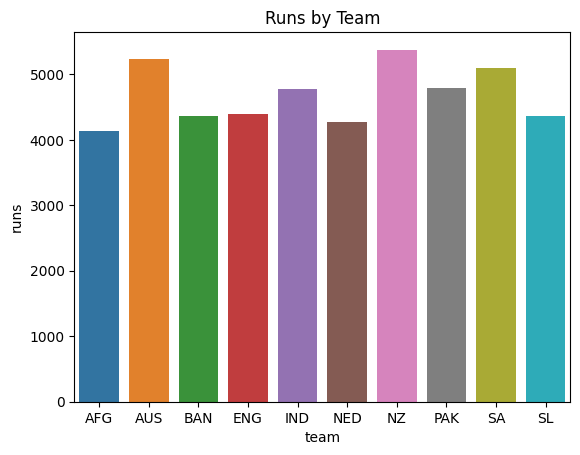

In [77]:
## Visualize team runs and wickets
sns.barplot(x='team', y='runs', data=team_performance)
plt.title('Runs by Team')
plt.show()

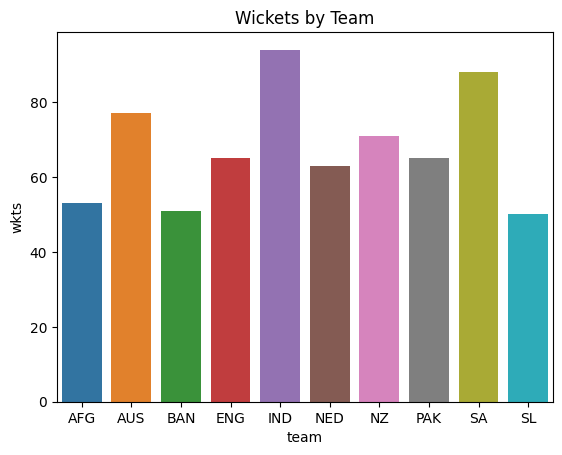

In [78]:
sns.barplot(x='team', y='wkts', data=team_performance)
plt.title('Wickets by Team')
plt.show()

In [80]:
# 2. Player Performance Analysis
## Individual player statistics
player_stats = df.groupby('player').agg({'runs': 'sum', 'wkts': 'sum', 'sr': 'mean'}).reset_index()
print(player_stats.sort_values(by='runs', ascending=False).head())  # Top run-scorers
print(player_stats.sort_values(by='wkts', ascending=False).head())  # Top wicket-takers

                       player  runs  wkts         sr
110           R Ravindra (NZ)   971   5.0   94.56700
148             V Kohli (IND)   726   1.0   82.95600
36           GJ Maxwell (AUS)   693   5.0  101.75125
13         BFW de Leede (NED)   626  16.0   58.71000
11   Azmatullah Omarzai (AFG)   623   7.0  100.35375
                        player  runs  wkts          sr
93        Mohammed Shami (IND)   214  23.0   56.666667
1                A Zampa (AUS)   519  22.0   75.230000
22           D Madushanka (SL)   553  21.0  107.636667
34              G Coetzee (SA)   450  20.0   80.320000
132  Shaheen Shah Afridi (PAK)   536  18.0   85.336667


In [81]:
# 3. Opposition and Ground Analysis
## Performance against different oppositions
opposition_performance = df.groupby(['team', 'opposition']).agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()
print(opposition_performance)

   team      opposition  runs  wkts
0   AFG     v Australia   563   6.0
1   AFG    v Bangladesh   303   3.0
2   AFG       v England   480  10.0
3   AFG         v India   525   2.0
4   AFG   v Netherlands   346   6.0
..  ...             ...   ...   ...
86   SL         v India   391   6.0
87   SL   v Netherlands   495   9.0
88   SL   v New Zealand   339   4.0
89   SL      v Pakistan   675   4.0
90   SL  v South Africa   733   5.0

[91 rows x 4 columns]


In [82]:
## Performance across different grounds
ground_performance = df.groupby(['team', 'ground']).agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()
print(ground_performance)

   team      ground  runs  wkts
0   AFG   Ahmedabad   473   5.0
1   AFG     Chennai   973  13.0
2   AFG       Delhi  1005  12.0
3   AFG  Dharamsala   303   3.0
4   AFG     Lucknow   346   6.0
..  ...         ...   ...   ...
67   SL       Delhi  1274  12.0
68   SL   Hyderabad   675   4.0
69   SL     Lucknow   906  13.0
70   SL        Pune   471   3.0
71   SL    Wankhede   391   6.0

[72 rows x 4 columns]


In [85]:
# 4. Temporal Analysis
## Convert start_date to datetime
df['start_date'] = pd.to_datetime(df['start_date'], format='%d-%b-%y', errors='coerce')

In [86]:
## Performance over time
df['year'] = df['start_date'].dt.year
yearly_performance = df.groupby(['year', 'team']).agg({'runs': 'sum', 'wkts': 'sum', 'bb_bf': 'sum'}).reset_index()
print(yearly_performance)

   year team  runs  wkts  bb_bf
0  2023  AFG  4134  53.0   4795
1  2023  AUS  5234  77.0   5482
2  2023  BAN  4358  51.0   4849
3  2023  ENG  4396  65.0   4620
4  2023  IND  4783  94.0   5191
5  2023  NED  4268  63.0   4802
6  2023   NZ  5376  71.0   5320
7  2023  PAK  4786  65.0   4787
8  2023   SA  5097  88.0   5348
9  2023   SL  4366  50.0   4516


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: Futu

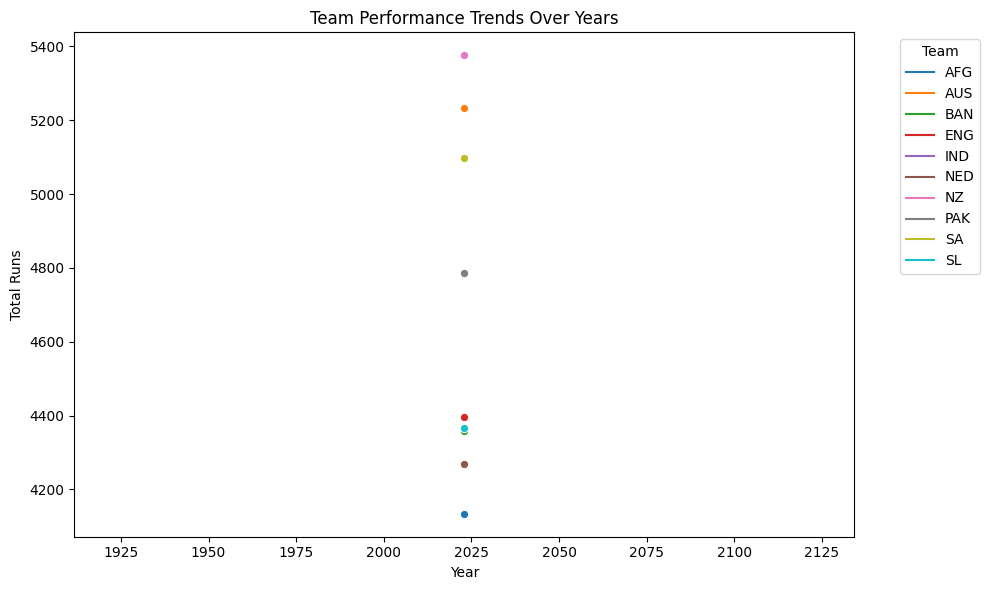

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Team Performance Trends Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=team_yearly, x='year', y='runs', hue='team', marker='o')
plt.title('Team Performance Trends Over Years')
plt.ylabel('Total Runs')
plt.xlabel('Year')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

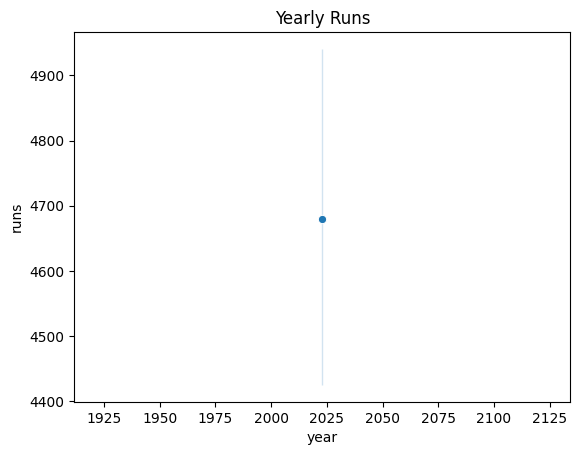

In [88]:
## Visualizing performance trends
sns.lineplot(x='year', y='runs', data=yearly_performance, marker='o')
plt.title('Yearly Runs')
plt.show()

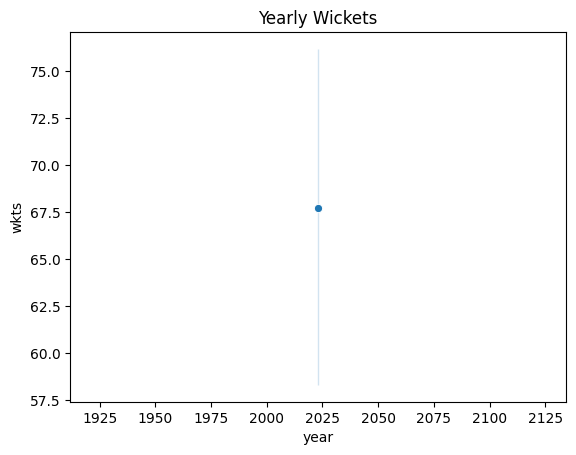

In [89]:
sns.lineplot(x='year', y='wkts', data=yearly_performance , marker='o')
plt.title('Yearly Wickets')
plt.show()